# Questionário 1 - Redes Complexas

## Renan de Oliveira da Cruz

Nº USP: 10801090

E-mail: r_oliveira@usp.br

GitHub: https://github.com/nan-oliveira


Primeiramente, importantos a biblioteca para lidar com as redes.


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import math

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

##1) Para a base lesmis, calcule  o terceiro e quarto momentos da distribuição do grau. 

Leitura de dados.

In [2]:
G = nx.read_edgelist("/content/lesmis.txt", nodetype=int, data=(('weight',float),))

Exibição de forma gráfica da rede.

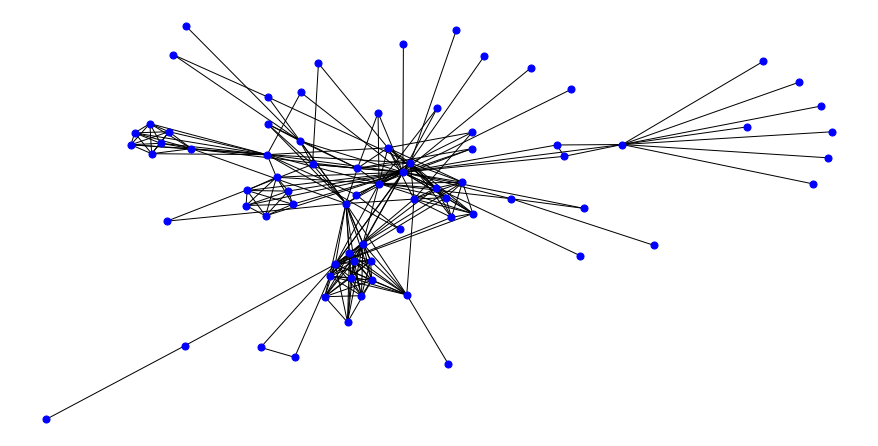

In [3]:
plt.figure(figsize=(12,6))

pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)

Abaixo selecionamos o maior componente da rede.

Componente: "sub-rede" na qual todos os seus nós podem acessar uns aos outros.

In [4]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])

Pode ser ser que os labels presentes nos nós não estejam na ordem sequencial que em que os labels são usados. Converteremos em em labels inteiros começando com índice zero.

In [5]:
G = nx.convert_node_labels_to_integers(G, first_label=0)

Vejamos agora o número de nós e de arestas da rede.

In [6]:
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

Number of nodes: 77
Number of edges: 254


Abaixo obtemos o degree dos vértices.

In [7]:
vk = dict(G.degree())
vk = list(vk.values())
vk = np.array(vk)
print('Degree:', vk)

Degree: [ 1 10  3  3  1  1  1  1  1  1 36  1  2  1  1  1 15 11 16 11 17  4  8  4
  1  2  6  6  6  6  6  3  2 22  7  7 19 15 13 10 10 10  9  3  7  9  7  7
  7  7  7  2 11  3  2  3  1  7  4  1  2 11 13  2  1 11  9 11 12 12 10  2
  2  7  2  1  1]


Definição da função que calcula os momentos.

O n-ésimo momento é definido por:

$$
<x^n> = \frac{x_1^n + x_2^n + ... + x_{N-1}^n + x_N^n}{N} = \frac{ \sum^N_{i=1} x_i ^n }{N}
$$

In [8]:
def moment(vector, order = 1):
  vector = np.array(vector)
  out = sum(vector ** order)/len(vector)
  return out

In [9]:
print("Third moment: ", np.round(moment(vk, 3), 2))
print("Fourth moment: ", np.round(moment(vk, 4), 2))

Third moment:  1408.03
Fourth moment:  33592.73


##2) Cálcule o coeficiente de complexidade da power grid

Leitura da rede.

In [10]:
# leitura da rede
G = nx.read_edgelist("/content/powergrid.txt", nodetype=int, data=(('weight',float),))

Exibição da rede em forma gráfica.

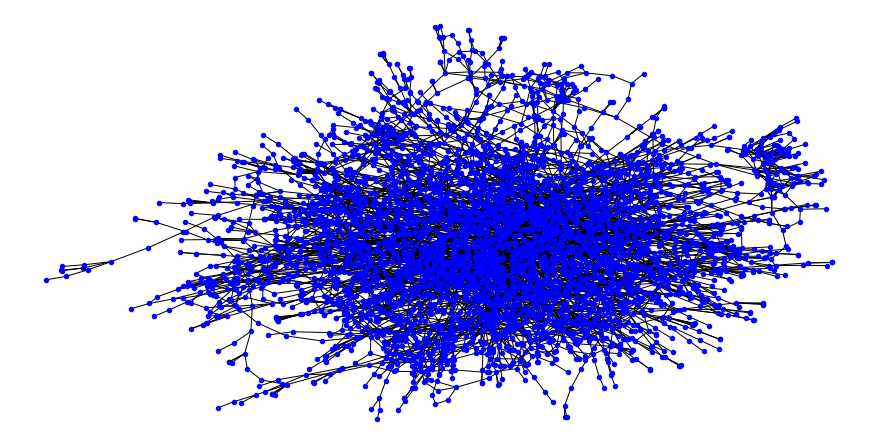

In [11]:
# plot da rede
plt.figure(figsize=(12,6))

pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=20, with_labels=False)

Tratamento e obtenção do número de nós e arestas da rede. Ainda, obtenção do degree dos vértices.

In [12]:
# maior compomente da rede
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])

# labels começando do zero
G = nx.convert_node_labels_to_integers(G, first_label=0)

# numero de nós e arestas
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

# degree dos vértices
vk = dict(G.degree())
vk = list(vk.values())
vk = np.array(vk)
print('Degree:', vk)

Number of nodes: 4941
Number of edges: 6594
Degree: [3 6 5 ... 2 1 2]


O coeficiente de complexidade é definido por:

$$
\alpha = \frac{ <k^2> }{ <k> }
$$

In [13]:
print("Complexity coefficient: ", np.round(moment(vk, 2)/moment(vk, 1), 2))

Complexity coefficient:  3.87


##3) Calcule a entropia de Shannon da rede Euro road

Leitura dos dados.

In [14]:
# leitura da rede
G = nx.read_edgelist("/content/euroroad.txt", nodetype=int, data=(('weight',float),))

Exibição da rede em forma gráfica.

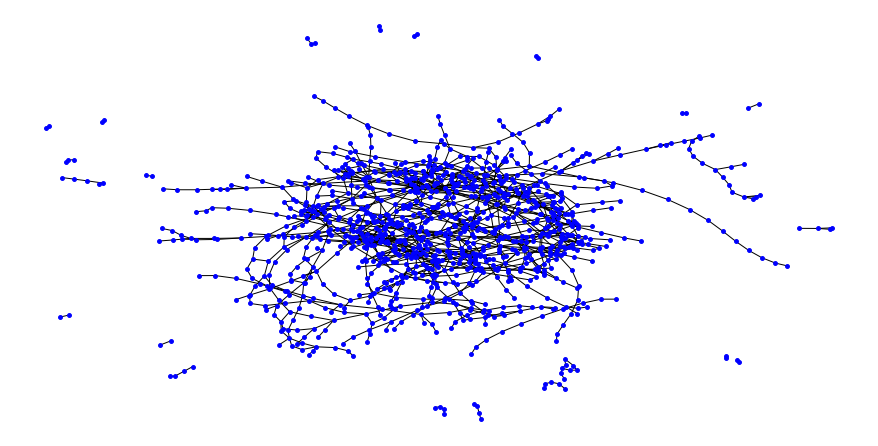

In [15]:
# plot da rede
plt.figure(figsize=(12,6))

pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=15, with_labels=False)

Tratamento da rede. Obtenção do número de nós e arestas e do degree dos vértices da rede.

In [16]:
# maior compomente da rede
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])

# labels começando do zero
G = nx.convert_node_labels_to_integers(G, first_label=0)

# numero de nós e arestas
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

# degree dos vértices
vk = dict(G.degree())
vk = list(vk.values())
vk = np.array(vk)
print('Degree:', vk)

Number of nodes: 1039
Number of edges: 1305
Degree: [2 8 2 ... 2 2 1]


A Entropia de Shannon é definida por:

$$
H = - \sum_{k=0}^{\infty} P(k) \cdot log_{2} (k)
$$


In [17]:
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values()) # we get only the degree values
    vk = np.array(vk)
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

Calculo da entropia de Shannon.

In [18]:
print("Shannon entropy: ", np.round(shannon_entropy(G), 2))

Shannon entropy:  2.0


##4) Para a rede de aeroportos dos Estados Unidos, obtenha:

 * a) transitivity

 * b) the avarege clustering coefficient 

Leituda dos dados.

In [19]:
# leitura da rede
G = nx.read_edgelist("/content/usairport.txt", nodetype=int, data=(('weight',float),))

Exibição da rede em forma gráfica.

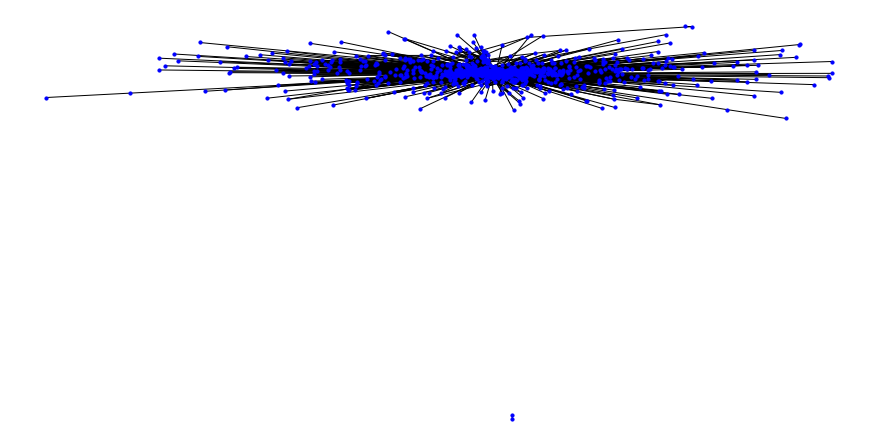

In [20]:
# plot da rede
plt.figure(figsize=(12,6))

pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=10, with_labels=False)

Tratamento e obtenção do número de nós e arestas da rede. Ainda, obtenção do degree dos vértices.

In [21]:
# maior compomente da rede
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])

# labels começando do zero
G = nx.convert_node_labels_to_integers(G, first_label=0)

# numero de nós e arestas
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

# degree dos vértices
vk = dict(G.degree())
vk = list(vk.values())
vk = np.array(vk)
print('Degree:', vk)

Number of nodes: 1572
Number of edges: 17214
Degree: [ 2 40  9 ...  1  1  1]


Calculo da transitividade e da média do clustering.

In [22]:
CC = (nx.transitivity(G)) 
print("Transitivity: ", "%3.4f"%CC)

avc = nx.average_clustering(G)
print("Average clustering:", "%3.4f"%avc)

Transitivity:  0.3841
Average clustering: 0.5048


##5) Calcule o coeficiente de complexidade e a entropia de Shannon para a rede US airport

Leituda dos dados.

In [23]:
# leitura da rede
G = nx.read_edgelist("/content/usairport.txt", nodetype=int, data=(('weight',float),))

Exibição da rede.

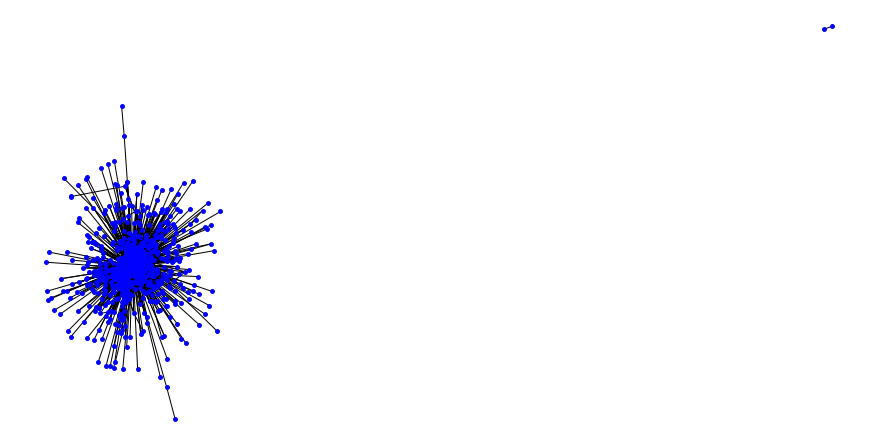

In [24]:
# plot da rede
plt.figure(figsize=(12,6))

pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=15, with_labels=False)

Tratamento e obtenção do número de nós e vértices da rede. Bem como a obtenção do do degree dos vétices.

In [25]:
# maior compomente da rede
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])

# labels começando do zero
G = nx.convert_node_labels_to_integers(G, first_label=0)

# numero de nós e arestas
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

# degree dos vértices
vk = dict(G.degree())
vk = list(vk.values())
vk = np.array(vk)
print('Degree:', vk)

Number of nodes: 1572
Number of edges: 17214
Degree: [ 2 40  9 ...  1  1  1]


Calculo do coeficiente de complexidade e da entropia de Shannon.

In [26]:
print("Complexity coefficient: ", np.round(moment(vk, 2)/moment(vk, 1), 2))
print("Entropy: ", np.round(shannon_entropy(G), 2))

Complexity coefficient:  112.23
Entropy:  4.99
